In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle


In [2]:
# Load the dataset
data = pd.read_csv('C:/Users/baran/OneDrive/Desktop/New folder (2)/kaggle/app_reviews.csv')

# Displaying the first few rows of the dataset to understand its structure
data.head()

,name,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,WhiteHatJr,All in one Captions,I was very unhappy with this app because I can...,1,1234,1.5.1,2020-09-18 09:21:07,Hi! Thank you for reviewing. Kindly note that ...,2020-09-18 11:58:46,most_relevant,com.whitehatjr
1,WhiteHatJr,githin george,Come on! Man it's not normal for kids to devel...,1,213,1.5.2,2020-09-30 14:34:38,"Hi, Thank you for reviewing and sharing your p...",2020-09-30 16:01:39,most_relevant,com.whitehatjr
2,WhiteHatJr,Anita Choudhury,This app is good for coding but I think this o...,1,156,1.5.1,2020-09-17 17:50:57,Hi! We apologize for the inconvenience. We wou...,2020-09-17 17:59:10,most_relevant,com.whitehatjr
3,WhiteHatJr,Snehil gupta,This app is good for coding but I think this o...,1,82,1.5.2,2020-10-09 21:10:06,"Hi, Thank you for reviewing. Please be apprise...",2020-10-10 10:35:40,most_relevant,com.whitehatjr
4,WhiteHatJr,UTKALIKA PRUSTI,It is good app . But it's app use only who has...,1,150,1.5.1,2020-09-21 05:27:50,Hi! Thank you for reviewing. Kindly note that ...,2020-09-21 10:46:15,most_relevant,com.whitehatjr


In [3]:
# Check for missing values
print("Missing values before preprocessing:")
print(data.isnull().sum())

Missing values before preprocessing:
name                       0
userName                   0
content                    1
score                      0
thumbsUpCount              0
reviewCreatedVersion    2329
at                         0
replyContent            6276
repliedAt               6276
sortOrder                  0
appId                      0
dtype: int64


In [4]:
# Drop rows with missing values in the 'content' and 'score' columns
data = data.dropna(subset=['content', 'score'])

In [5]:
# Check for missing values
print("Missing values before preprocessing:")
print(data.isnull().sum())

Missing values before preprocessing:
name                       0
userName                   0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2329
at                         0
replyContent            6275
repliedAt               6275
sortOrder                  0
appId                      0
dtype: int64


In [6]:
# Convert 'score' to binary sentiment label
data['sentiment'] = np.where(data['score'] > 3, 'Positive', 'Negative')

In [7]:
data.head()

,name,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,sentiment
0,WhiteHatJr,All in one Captions,I was very unhappy with this app because I can...,1,1234,1.5.1,2020-09-18 09:21:07,Hi! Thank you for reviewing. Kindly note that ...,2020-09-18 11:58:46,most_relevant,com.whitehatjr,Negative
1,WhiteHatJr,githin george,Come on! Man it's not normal for kids to devel...,1,213,1.5.2,2020-09-30 14:34:38,"Hi, Thank you for reviewing and sharing your p...",2020-09-30 16:01:39,most_relevant,com.whitehatjr,Negative
2,WhiteHatJr,Anita Choudhury,This app is good for coding but I think this o...,1,156,1.5.1,2020-09-17 17:50:57,Hi! We apologize for the inconvenience. We wou...,2020-09-17 17:59:10,most_relevant,com.whitehatjr,Negative
3,WhiteHatJr,Snehil gupta,This app is good for coding but I think this o...,1,82,1.5.2,2020-10-09 21:10:06,"Hi, Thank you for reviewing. Please be apprise...",2020-10-10 10:35:40,most_relevant,com.whitehatjr,Negative
4,WhiteHatJr,UTKALIKA PRUSTI,It is good app . But it's app use only who has...,1,150,1.5.1,2020-09-21 05:27:50,Hi! Thank you for reviewing. Kindly note that ...,2020-09-21 10:46:15,most_relevant,com.whitehatjr,Negative


In [8]:
# Check the distribution of sentiments
print("\nSentiment distribution:")
print(data['sentiment'].value_counts())


Sentiment distribution:
sentiment
Negative    8714
Positive    4399
Name: count, dtype: int64


In [9]:
# Display the first few rows after preprocessing
print("\nSample of preprocessed data:")
print(data[['content', 'score', 'sentiment']].head())


Sample of preprocessed data:
                                             content  score sentiment
0  I was very unhappy with this app because I can...      1  Negative
1  Come on! Man it's not normal for kids to devel...      1  Negative
2  This app is good for coding but I think this o...      1  Negative
3  This app is good for coding but I think this o...      1  Negative
4  It is good app . But it's app use only who has...      1  Negative


In [10]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [11]:
# Apply TF-IDF vectorization to 'content' column
tfidf_features = tfidf_vectorizer.fit_transform(data['content'])

In [12]:
# Convert sparse matrix to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [13]:
# Display the TF-IDF matrix
print("\nTF-IDF matrix:")
print(tfidf_df.head())


TF-IDF matrix:
    00  000   09   10  100  1000  1005  1080p  10th   11  ...  वजह  सबम  समय  \
0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0   0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0   0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0   0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0   0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0   0.0  0.0  ...  0.0  0.0  0.0   

    हम   එය   මට  𝘨𝘦𝘵𝘵𝘪𝘯𝘨   𝘪𝘴   𝘪𝘵  𝘸𝘰𝘳𝘴𝘵  
0  0.0  0.0  0.0      0.0  0.0  0.0    0.0  
1  0.0  0.0  0.0      0.0  0.0  0.0    0.0  
2  0.0  0.0  0.0      0.0  0.0  0.0    0.0  
3  0.0  0.0  0.0      0.0  0.0  0.0    0.0  
4  0.0  0.0  0.0      0.0  0.0  0.0    0.0  

[5 rows x 5000 columns]


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['sentiment'], test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (10490, 5000) (10490,)
Testing set shape: (2623, 5000) (2623,)


In [15]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predictions on the testing set
y_pred = rf_classifier.predict(X_test)

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.776591688905833

Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.93      0.84      1705
    Positive       0.79      0.49      0.61       918

    accuracy                           0.78      2623
   macro avg       0.78      0.71      0.72      2623
weighted avg       0.78      0.78      0.76      2623



## Naive Bayes

In [19]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [20]:
# Apply TF-IDF vectorization to 'content' column
tfidf_features = tfidf_vectorizer.fit_transform(data['content'])

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['sentiment'], test_size=0.2, random_state=42)

In [23]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

In [25]:
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.7483797178802898


In [26]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.90      0.82      1705
    Positive       0.72      0.46      0.56       918

    accuracy                           0.75      2623
   macro avg       0.74      0.68      0.69      2623
weighted avg       0.74      0.75      0.73      2623




Random Forest Confusion Matrix:
[[1588  117]
 [ 469  449]]


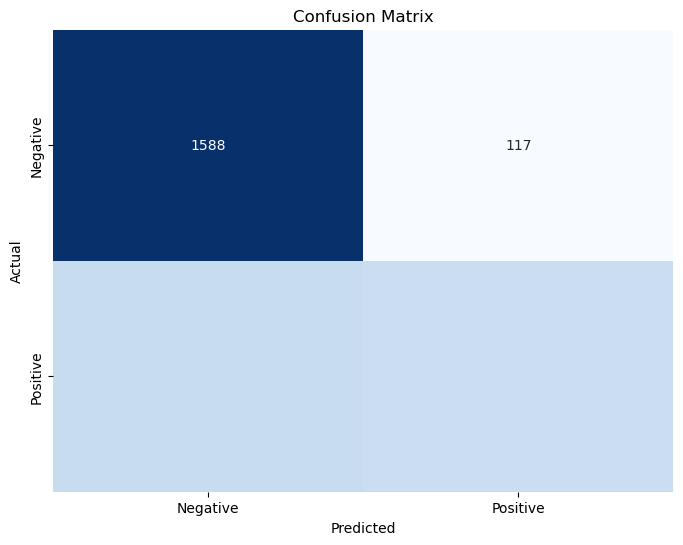

In [28]:
# Compare the two models using confusion matrices
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Naive Bayes Confusion Matrix:
[[1538  167]
 [ 493  425]]


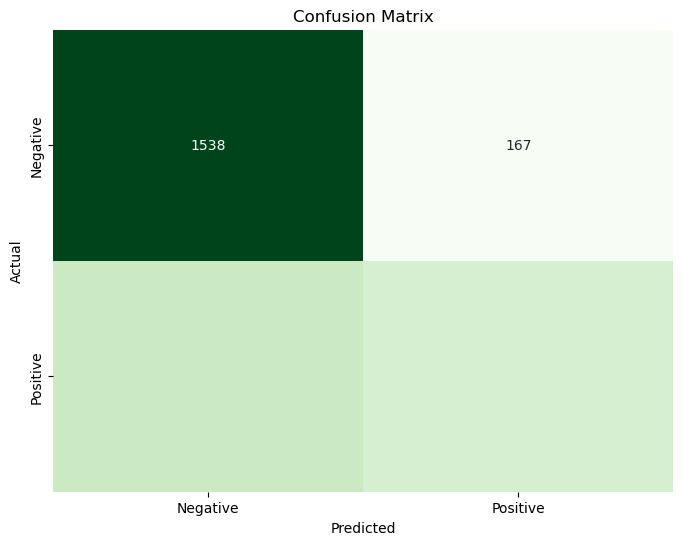

In [30]:
print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))
conf_matrix = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Function to test user input sentiment with both models
def test_user_input_sentiment(input_text):
    preprocessed_input = tfidf_vectorizer.transform([input_text])
    rf_predicted_sentiment = rf_classifier.predict(preprocessed_input)
    nb_predicted_sentiment = nb_classifier.predict(preprocessed_input)
    return rf_predicted_sentiment[0], nb_predicted_sentiment[0]

In [32]:
# Test user input sentiment with both models
user_input = input("Enter your review: ")
rf_predicted_sentiment, nb_predicted_sentiment = test_user_input_sentiment(user_input)

print("\nPredicted Sentiment (Random Forest):", rf_predicted_sentiment)
print("Predicted Sentiment (Naive Bayes):", nb_predicted_sentiment)

Enter your review:  worst app ever



Predicted Sentiment (Random Forest): Negative
Predicted Sentiment (Naive Bayes): Negative


In [33]:
# Hybrid Algorithm
def hybrid_algorithm(input_text):
    preprocessed_input = tfidf_vectorizer.transform([input_text])
    rf_prediction = rf_classifier.predict(preprocessed_input)
    nb_prediction = nb_classifier.predict(preprocessed_input)
    if rf_prediction == nb_prediction:
        return rf_prediction[0]
    else:
        return "Hybrid Algorithm: Undetermined"

In [44]:
# Test the hybrid algorithm for a single input
test_input = X_test.iloc[30]  # Assuming X_test_text contains the original text data
print("Input Text:", test_input)
hybrid_prediction = hybrid_algorithm(test_input)
print("Hybrid Prediction:", hybrid_prediction)

Input Text: It won't allow my son to log on through his phone. Asking for email verification by inputting password (which we did correctly), cycles as if its loading, then takes me back to the home page without logging him in.
Hybrid Prediction: Negative


In [45]:
# Shuffle the data and reset indices
data_shuffled = shuffle(data, random_state=42).reset_index(drop=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_shuffled['content'], data_shuffled['sentiment'], test_size=0.2, random_state=42)

# Function to calculate hybrid algorithm accuracy
def calculate_hybrid_accuracy(X_test, y_test):
    correct_predictions = 0
    total_predictions = len(X_test)
    for i in range(total_predictions):
        input_text = X_test.iloc[i]  # Access data using iloc
        true_label = y_test.iloc[i]  # Access data using iloc
        hybrid_predicted_sentiment = hybrid_algorithm(input_text)
        
        if hybrid_predicted_sentiment == true_label:
            correct_predictions += 1
    
    hybrid_accuracy = correct_predictions / total_predictions
    return hybrid_accuracy

In [46]:
 # Calculate hybrid algorithm accuracy
hybrid_accuracy = calculate_hybrid_accuracy(X_test, y_test)
print("\nHybrid Algorithm Accuracy:", hybrid_accuracy)


Hybrid Algorithm Accuracy: 0.764391917651544
